### <u>Homework 3: Trains</u>
- By Thomas Truong

<b>Description</b>
- Homework 3 involves analysis of data recording information about freight train accidents (including mostly minor incidents, such as driving into an occupied block, but with no collisions).  You will be making a Jupyter Notebook, and including the data file FRAFirm2.csv, which is located in Canvas under Modules > Extra Files > Homework 3.

- Each record in the file contains information about one particular shift that an engineer or conductor worked.  Clock-in and clock-out information, plus many statistics, are provided. The time of clock-in is in the column named 'Start', and this value is given as the number of minutes since midnight.  So if the person clocked-in at 7:00 am, this would be recorded as 420 (60 minutes * 7 o'clock).  The clock-out information is in the column named 'End'.  The column labeled 'FIRMF' is the estimated fatigue level of the person, with values ranging from -10 (really fatigued) to +10 (really alert).

- One column, named 'class', is actually the target.  This column contains an integer that can have one of three values:
  - 0: No accident occurred during this shift
  - 1: An accident of type '1' occurred during this shift
  - 2: An accident of type '2' occurred during this shift

- There are many other features (columns of input data), but you don't really know what each column represents.  You might make some educated guesses, but you shouldn't really need to know what each column represents to complete this work.  We are simply interested in finding the features (columns) that indicate a higher percentage of accidents.  Of even more interest is finding two or more columns that, when taken together, can be used to identify a higher probability of accident.


- Here is the interesting twist: Just because an engineer might be working with a certain combination of features does not guarantee that an accident will occur!  However, the hypothesis is that for some ranges of some features, the probability of an accident increases.  So the real question is, for given features, what is the probability of an accident?  Which features lead to an increased probability, and which do not really affect the probability? 

- Some of the features represent a range of values, such as the Start time.  This has values ranging from 0 to 1439, representing the clock-in time as minutes since midnight.  Rather than using this actual value, it might be best to divide the values into 'bins'.  For example, you might want to use 'hours of the day' rather than 'minutes of the day'.  You can make a new column that takes the values from 'Start', then rounding to the nearest hour.  Or you might separate the values into 3-hour bins, so you only have values from 0-7.  You can then group the records based on this new column, then in each group determine the percentage of records in that group that are accidents.  You might find that in the 7 am bin, there is a 28% chance of accident, but in the 6 am bin there is a 32% chance.

- Here are some things to consider:
  - Because of the probabilistic nature of the problem, the standard logistic regression might not work too well.  Do the logistic regressions, see if you can find some interesting results.  But in addition to this, try other techniques, such as the grouping talked about above.
  - In addition to dividing individual features into bins, then determining the probabilities in each bin, you might consider examining two features, building a 2-dimensional set of bins.  It might be that certain combinations of features lead to a better identification of risk.
  - When determining the probability of risk in a 'bin', consider that if a bin only as a few records, then the probability estimate will not be that convincing.  For example, suppose you were looking at a clock-in bin but found only two records where the person clocked in at 3 am. (I don't know if this is actually the case, we are just making an assumption here).  If both of those records happened to be accidents, you might conclude that starting work at 3 am is 100% guaranteed to have an accident.  Again, these are probabilities, so it is not realistic to conclude a probability of 100% for any bin.  So be careful about this!

- A number of people have analyzed this train data, and there are two schools of thought:
  - (A) The two types of accident, 1 and 2, really are different types of accident, caused by different situations, so these should be distinguishable by the various statistics in the file.  In other words, in one bin, type 1 accidents are much more likely than type 2 accidents, while in another bin the reverse is true.  If we can find a number of bins with these differences, this suggests that the two types of accident are distinguishable.
  - (B) The two types of accident are indistinguishable, there is no real difference.  While there are different numbers of type 1 and type 2 accidents, so the probabilities won't match in every bin, but if the probabilities are roughly proportional, then we can't distinguish the accidents.  For example, if there were twice as many type 1 as type 2 accidents, then in any bin we would expect the probability of a type 1 accident to be roughly twice the probability of type 2.

- The first question we would like answered is this: Are the two types of accident distinguishable?  Is there a fairly reliable way to tell these apart?

- The second question (which depends upon the answer to the first!) is this: Which features or combination of features are the most useful for predicting accidents, so that if we build bins using these features, some bins will have relatively low probabilities (and hence show good working conditions), while other bins have relatively high probabilities (and show poor working conditions).  If we can find answers to this question, we can identify good vs poor working policies.

- And how do you choose to visualize your results?  Do you have graphs, confusion matrices, or charts?

- The third question is this: Which of the features (input columns) are not significant in performing the classification, and can hence be ignored.

- There is also an opportunity for some extra credit.  In the introduction I mentioned the FIRMF column, that contains our estimation of an employee's fatigue.  We actually have two similar calculations, the other using the FIRM column.  The question is: which is better, or are they both roughly the same?  If your results in step 2 show that either FIRM or FIRMF is part of your solution, in this part show how your results would differ by using the other column.

- What I am looking for is not so much your results, but I am looking to see your thought processes, how do you prepare and analyze the data.  So even if your results are inconclusive, if you are using good techniques in your work, you get a good grade!  But if you do have conclusive results, that would be great!

- In your Jupyter notebook, in addition to the cells which contain the code, include markdown cells explaining what you are doing, or highlighting conclusions that you can draw from the analysis.

- It is helpful if you do NOT clear the cells before turning in your results, because otherwise I have to run all of your results rather than just reading all of your results!

- Check your notebook in to Canvas to submit your homework!

##### <u>Extracting Data From CSV</u>

In [875]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Name of the file.
DATA_NAME = "FRAFirm2.csv"


# Turns the CSV into a dataframe.
def csv_to_dataframe():
  data = pd.read_csv(DATA_NAME)
  return pd.DataFrame(data)


# Main part of the program starts here.
dataframe = csv_to_dataframe()

# Display dataframe.
dataframe

,FIRM,Class,Start,End,TOD,FIRMF,Length,Night,Gap,WS,...,AFZ,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW
0,-3,0,170,680,-1,-3,510,0,750,0,...,0,0,0,0,0,2269,1,0,3,2.0
1,5,0,920,1295,-1,5,375,0,855,0,...,0,1,0,0,0,465,0,0,1,1.0
2,1,1,1130,1865,1470,-2,735,0,999,0,...,0,0,0,0,0,2855,2,0,5,0.0
3,4,0,670,1265,-1,4,595,0,605,0,...,0,1,0,0,0,1325,0,0,2,1.5
4,3,0,330,1049,-1,3,719,0,999,1,...,0,1,0,1,0,2434,2,0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7067,-1,0,225,855,-1,-1,630,0,999,0,...,0,0,0,0,0,824,0,0,3,0.0
7068,5,1,1245,2030,1410,0,785,0,999,1,...,0,0,0,0,0,0,0,0,0,0.0
7069,5,0,1201,1365,-1,5,164,0,999,0,...,0,0,0,0,0,2000,1,0,3,0.0
7070,5,0,945,1485,-1,5,540,0,999,0,...,0,1,0,0,0,495,0,0,1,0.0


##### <u>Checking for NaN</u>

In [876]:
nan_df = dataframe[dataframe.isna().any(axis=1)]
nan_df

,FIRM,Class,Start,End,TOD,FIRMF,Length,Night,Gap,WS,...,AFZ,WAFZ,MFZ,WMFZ,NBad,TIW,RIW,HIW,SIW,CCW


##### <u>2D Bin</u>

In [877]:
# Amount of hours per bin.
X_HOURS_PER_BIN = 1
X_LENGTH_PER_BIN = 100
X_GAP_PER_BIN = 100
X_TIW_PER_BIN = 200


def bin_time(dataframe, column_name, x_hours):
  """Bins the data by time (0-23)."""
  bins = np.arange(0, 24, x_hours)
  binned = pd.cut((dataframe[column_name] % 1440) // (60 * x_hours), bins=np.insert(bins, 0, -1),
                                                                     include_lowest=True)
  
  binned = binned.cat.remove_unused_categories()
  return binned.map(lambda x: int(x.right))


def bin_firm(dataframe, column_name):
  """Bins the data based on negative, neutral, or positive."""
  bins = []
  for row in dataframe.iterrows():
    value = row[1].get(column_name)
    if (value < 0):
      bins.append("Negative")  # Negative bin.
    elif (value == 0):
      bins.append("Neutral")  # Neutral bin.
    else:
      bins.append("Positive")  # Positive bin.

  return bins


def bin_measurement(dataframe, column_name, x_amount):
  """Bins the measurements by X amount."""
  bins = np.arange(0, dataframe[column_name].max() + x_amount, x_amount)
  binned = pd.cut(pd.to_numeric(dataframe[column_name]), bins=bins, include_lowest=True)

  binned = binned.cat.remove_unused_categories()
  return binned.map(lambda x: int(x.left))


def bin_bool(dataframe, column_name):
  """Bins the data based on its boolean value (1 = true, 0 = false)."""
  bins = []
  for row in dataframe.iterrows():
    value = row[1].get(column_name)
    if (value):
      bins.append("Yes")  # Yes bin.
    else:
      bins.append("No")  # No bin.

  return bins


# Create new dataframe just for the bins.
dataframe_bins = pd.DataFrame()
dataframe_bins["Class"] = dataframe["Class"].copy()

# Bin columns that seem useful/needed to be binned.
dataframe_bins["_FIRM"] = bin_firm(dataframe, "FIRM")
dataframe_bins["_Start"] = bin_time(dataframe, "Start", X_HOURS_PER_BIN)
dataframe_bins["_End"] = bin_time(dataframe, "End", X_HOURS_PER_BIN)
dataframe_bins["_FIRMF"] = bin_firm(dataframe, "FIRMF")
dataframe_bins["_Length"] = bin_measurement(dataframe, "Length", X_LENGTH_PER_BIN)
dataframe_bins["_Night"] = bin_bool(dataframe, "Night")
dataframe_bins["_Gap"] = bin_measurement(dataframe, "Gap", X_GAP_PER_BIN)
dataframe_bins["_WS"] = bin_bool(dataframe, "WS")
dataframe_bins["_TIW"] = bin_measurement(dataframe, "TIW", X_TIW_PER_BIN)

dataframe_bins

,Class,_FIRM,_Start,_End,_FIRMF,_Length,_Night,_Gap,_WS,_TIW
0,0,Negative,2,11,Negative,500,No,700,No,2200
1,0,Positive,15,21,Positive,300,No,800,No,400
2,1,Positive,18,7,Negative,700,No,900,No,2800
3,0,Positive,11,21,Positive,500,No,600,No,1200
4,0,Positive,5,17,Positive,700,No,900,Yes,2400
...,...,...,...,...,...,...,...,...,...,...
7067,0,Negative,3,14,Negative,600,No,900,No,800
7068,1,Positive,20,9,Neutral,700,No,900,Yes,0
7069,0,Positive,20,22,Positive,100,No,900,No,1800
7070,0,Positive,15,0,Positive,500,No,900,No,400


##### <u>Calculate Accident Probability for Each</u>

Utility

In [878]:
RESULT_COLUMNS = ["Type 1", "Type 2", "Type 1 & 2"]

def get_accident_probability(dataframe, column_name, bin):
  """Calculates the accident probability for a bin."""
  classes = [0, 0, 0]
  for item in dataframe[dataframe[column_name] == bin].iterrows():
    classes[pd.to_numeric(item[1]["Class"])] += 1

  # Get the probabilty of accidents [1, 2, total].
  type1_prob = classes[1] / sum(classes)
  type2_prob = classes[2] / sum(classes)
  type_dict = {"Type 1": type1_prob, "Type 2": type2_prob, "Type 1 & 2": type1_prob + type2_prob}
  
  return type_dict

_FIRM

In [879]:
# Get probabilities.
firm_probs = []
unique_firms = [value for value, df in dataframe_bins.groupby("_FIRM")]
for unique_value in unique_firms:
  firm_probs.append(get_accident_probability(dataframe_bins, "_FIRM", unique_value))

# Turn into Dataframe.
firm_result = pd.DataFrame(firm_probs)

# Display DataFrame.
firm_result

,Type 1,Type 2,Type 1 & 2
0,0.222642,0.079665,0.302306
1,0.231481,0.072222,0.303704
2,0.234386,0.084157,0.318544


_Start

In [880]:
# Calculate all probabilites and store it into an array.
start_probs = []
unique_starts = [value for value, df in dataframe_bins.groupby("_Start")]
for unique_value in unique_starts:
  start_probs.append(get_accident_probability(dataframe_bins, "_Start", unique_value))


# Turn into DataFrame.
start_result = pd.DataFrame(start_probs)

# Display DataFrame.
start_result

,Type 1,Type 2,Type 1 & 2
0,0.306220,0.066986,0.373206
1,0.279570,0.118280,0.397849
2,0.292308,0.097436,0.389744
3,0.322222,0.094444,0.416667
4,0.292683,0.063415,0.356098
5,0.202381,0.083333,0.285714
6,0.231850,0.098361,0.330211
7,0.216630,0.072210,0.288840
8,0.210826,0.037037,0.247863
9,0.188119,0.115512,0.303630


_End

In [881]:
# Calculate all probabilites and store it into an array.
end_probs = []
unique_ends = [value for value, df in dataframe_bins.groupby("_End")]
for unique_value in unique_ends:
  end_probs.append(get_accident_probability(dataframe_bins, "_End", unique_value))


# Turn into DataFrame.
end_result = pd.DataFrame(end_probs)

# Display DataFrame.
end_result

,Type 1,Type 2,Type 1 & 2
0,0.219512,0.073171,0.292683
1,0.188889,0.081481,0.270370
2,0.189369,0.083056,0.272425
3,0.229391,0.086022,0.315412
4,0.221453,0.096886,0.318339
5,0.200000,0.098246,0.298246
6,0.180428,0.070336,0.250765
7,0.166667,0.099291,0.265957
8,0.257235,0.099678,0.356913
9,0.277372,0.091241,0.368613


_FIRMF

In [882]:
# Get probabilities.
firmf_probs = []
unique_firmfs = [value for value, df in dataframe_bins.groupby("_FIRMF")]

for unique_value in unique_firmfs:
  firmf_probs.append(get_accident_probability(dataframe_bins, "_FIRMF", unique_value))

# Turn into Dataframe.
firmf_result = pd.DataFrame(firmf_probs)

# Display DataFrame.
firmf_result

,Type 1,Type 2,Type 1 & 2
0,0.308932,0.105779,0.414711
1,0.229630,0.077778,0.307407
2,0.169160,0.063639,0.232798


_Length

In [883]:
# Calculate probabilities.
length_probs = []
unique_lengths = [value for value, df in dataframe_bins.groupby("_Length")]
for unique_value in unique_lengths:
  length_probs.append(get_accident_probability(dataframe_bins, "_Length", unique_value))

# Turn into DataFrame and display.
length_result = pd.DataFrame(length_probs)
length_result

,Type 1,Type 2,Type 1 & 2
0,0.187500,0.156250,0.343750
1,0.205298,0.092715,0.298013
2,0.083636,0.036364,0.120000
3,0.067961,0.036893,0.104854
4,0.051366,0.046995,0.098361
5,0.076128,0.047932,0.124060
6,0.176976,0.069588,0.246564
7,0.309020,0.081292,0.390312
8,0.497126,0.158046,0.655172
9,0.644366,0.161972,0.806338


_Night

In [884]:
# Calculate probabilities.
night_probs = []
unique_nights = [value for value, df in dataframe_bins.groupby("_Night")]
for unique_value in unique_nights:
  night_probs.append(get_accident_probability(dataframe_bins, "_Night", unique_value))

# Turn into DataFrame and display.
night_result = pd.DataFrame(night_probs)
night_result

,Type 1,Type 2,Type 1 & 2
0,0.266834,0.097755,0.364590
1,0.154447,0.048590,0.203037


_Gap

In [885]:
# Calculate probabilities.
gap_probs = []
unique_gaps = [value for value, df in dataframe_bins.groupby("_Gap")]
for unique_value in unique_gaps:
  gap_probs.append(get_accident_probability(dataframe_bins, "_Gap", unique_value))

# Turn into DataFrame and display.
gap_result = pd.DataFrame(gap_probs)
gap_result

,Type 1,Type 2,Type 1 & 2
0,0.000000,0.000000,0.000000
1,0.000000,0.181818,0.181818
2,0.248000,0.076000,0.324000
3,0.236715,0.062802,0.299517
4,0.215719,0.095318,0.311037
5,0.206856,0.080378,0.287234
6,0.197674,0.071221,0.268895
7,0.241598,0.083901,0.325499


_WS

In [886]:
# Calculate probabilities.
ws_probs = []
unique_wss = [value for value, df in dataframe_bins.groupby("_WS")]
for unique_value in unique_wss:
  ws_probs.append(get_accident_probability(dataframe_bins, "_WS", unique_value))

# Turn into DataFrame and display.
ws_result = pd.DataFrame(ws_probs)
ws_result

,Type 1,Type 2,Type 1 & 2
0,0.225726,0.079702,0.305428
1,0.242935,0.087500,0.330435


_TIW

In [887]:
# Calculate probabilities.
tiw_probs = []
unique_tiws = [value for value, df in dataframe_bins.groupby("_TIW")]
for unique_value in unique_tiws:
  tiw_probs.append(get_accident_probability(dataframe_bins, "_TIW", unique_value))

# Turn into DataFrame and display.
tiw_result = pd.DataFrame(tiw_probs)
tiw_result

,Type 1,Type 2,Type 1 & 2
0,0.068410,0.024145,0.092555
1,0.123457,0.049383,0.172840
2,0.134409,0.043011,0.177419
3,0.131687,0.057613,0.189300
4,0.182390,0.132075,0.314465
5,0.200000,0.084211,0.284211
6,0.230519,0.100649,0.331169
7,0.222222,0.078431,0.300654
8,0.222222,0.077778,0.300000
9,0.263158,0.093301,0.356459


##### <u>Plotting Graphs</u>

Utility

In [888]:
import matplotlib.pyplot as plt

def plot_accidents(column, result, xticks, xlabel, xlabel_angled = False):
  """Create and set up a figure."""
  fig, axs = plt.subplots(3, layout='constrained')
  fig.suptitle(f"{column} Accident Probabilty")
  fig.supxlabel(xlabel)
  fig.supylabel("Accident Probability")

  # Create plots.
  for i in np.arange(0, 3):
    axs[i].bar(np.arange(0, len(xticks)), result[RESULT_COLUMNS[i]])
    axs[i].xaxis.set_ticks(np.arange(0, len(xticks)), xticks, rotation=45 if xlabel_angled else 0)
    axs[i].set_title(f"{RESULT_COLUMNS[i]} Accident")

  # Display figure.
  fig.show()

FIRM

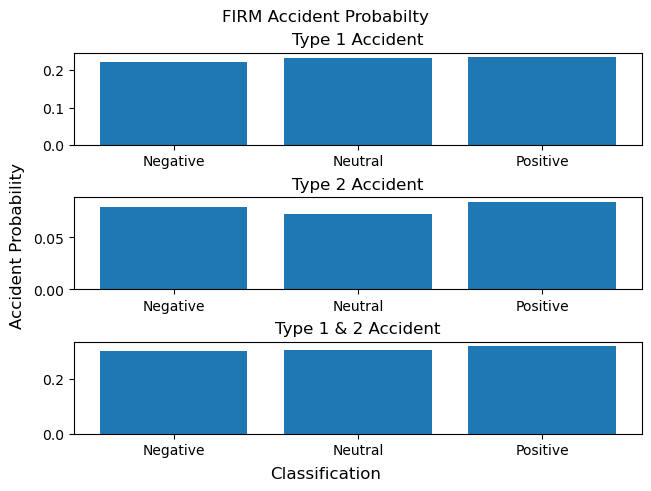

In [889]:
plot_accidents("FIRM", firm_result, unique_firms, "Classification")

Start

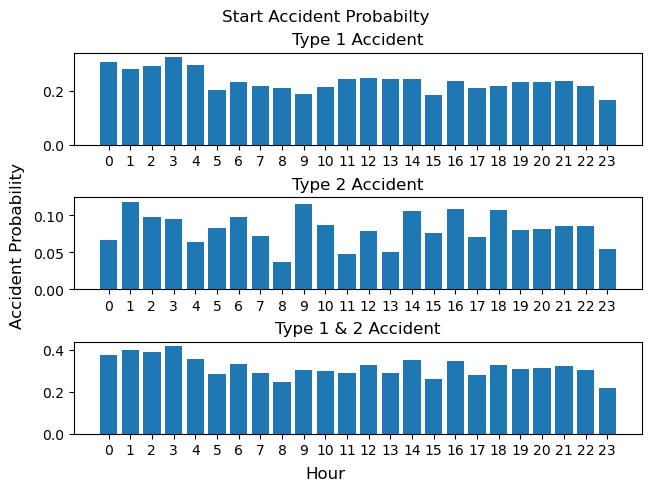

In [890]:
plot_accidents("Start", start_result, unique_starts, "Hour")

End

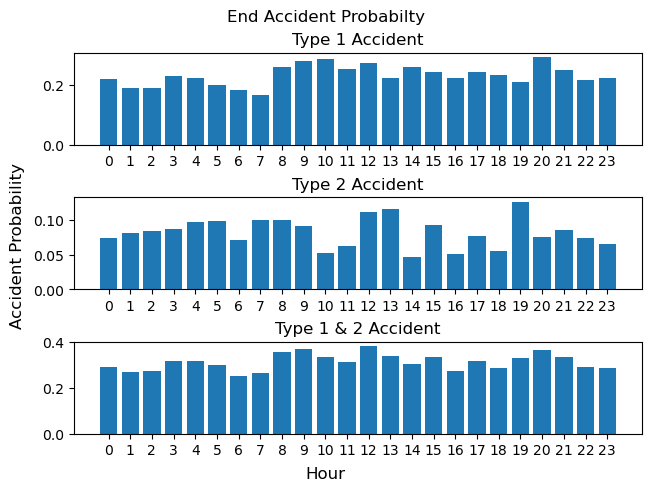

In [891]:
plot_accidents("End", end_result, unique_ends, "Hour")

FIRMF

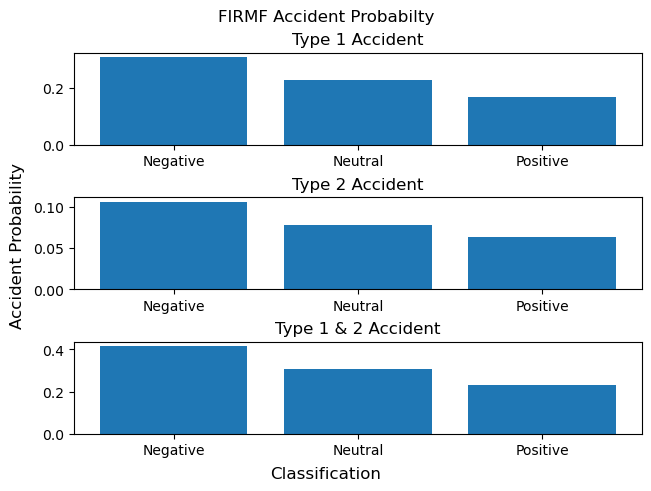

In [892]:
plot_accidents("FIRMF", firmf_result, unique_firmfs, "Classification")

Length

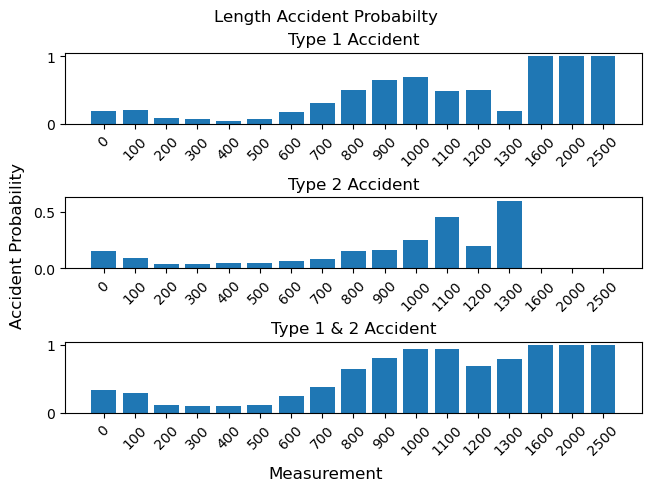

In [893]:
plot_accidents("Length", length_result, unique_lengths, "Measurement", True)

Night

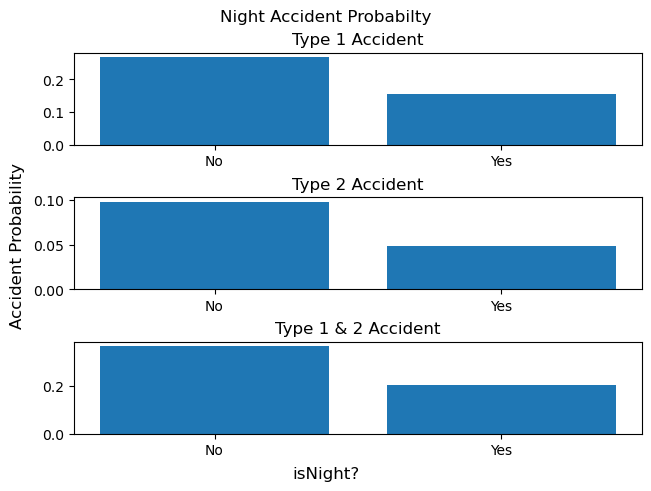

In [897]:
plot_accidents("Night", night_result, unique_nights, "isNight?")

Gap

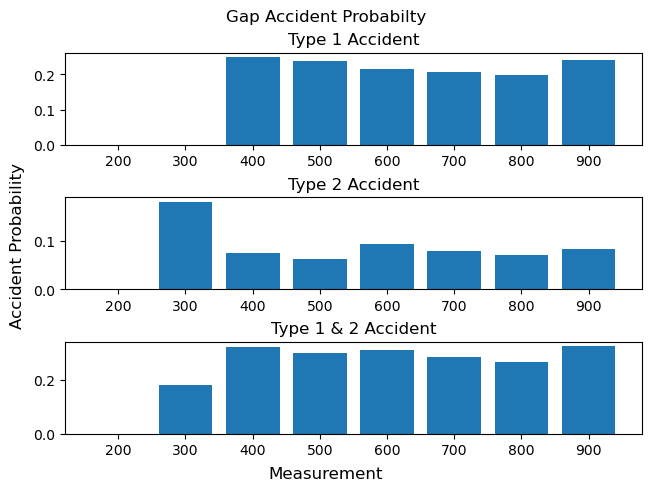

In [898]:
plot_accidents("Gap", gap_result, unique_gaps, "Measurement")

WS

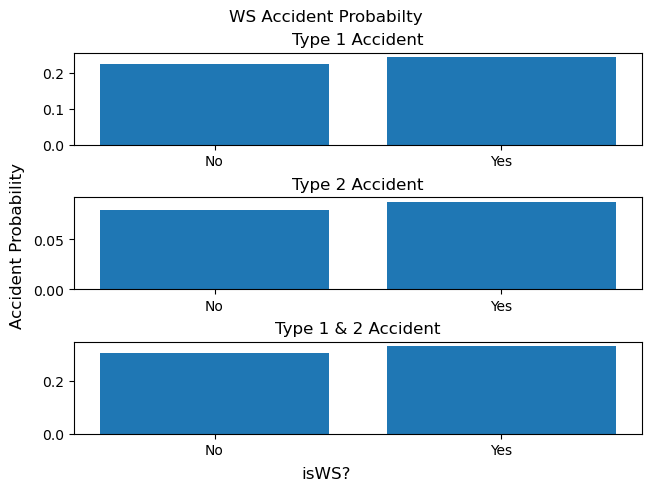

In [899]:
plot_accidents("WS", ws_result, unique_wss, "isWS?")

TIW

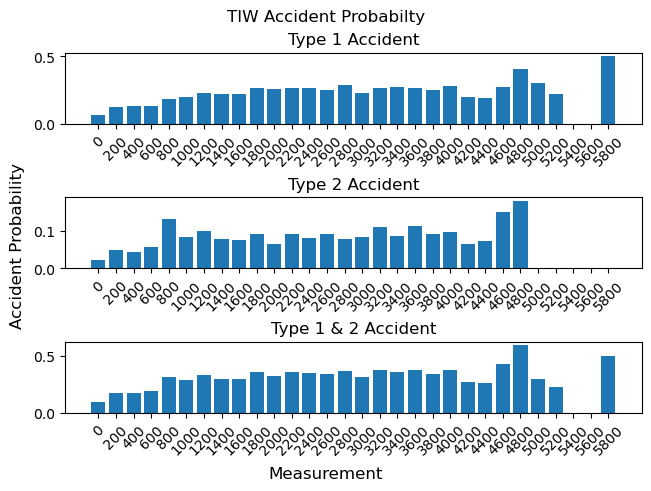

In [901]:
plot_accidents("TIW", tiw_result, unique_tiws, "Measurement", True)